In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot, iplot
import cufflinks as cf
import seaborn as sns
import pandas_profiling as pf

%matplotlib inline

# **Training Data**

In [2]:
df = pd.read_excel('Data_Train.xlsx')
print(df.shape)
df.head()

(10683, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## **Auto EDA**

In [ ]:
pf.ProfileReport(df)

## **Feature engineering**

In [4]:
# Removing the missing values

df.dropna(how='any', inplace=True)
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Date of journey

In [5]:
# formatting the date columns to the date format

df['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [6]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True)
df['Day_of_Journey'] = (df['Date_of_Journey']).dt.day 
df['Month_of_Journey'] = (df['Date_of_Journey']).dt.month

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [8]:
df.drop(columns='Date_of_Journey', axis=1, inplace=True)

Departure time

In [9]:
df['Dep_Time']

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10682, dtype: object

In [10]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_Hour'] = (df['Dep_Time']).dt.hour
df['Dep_Minute'] = (df['Dep_Time']).dt.minute

In [11]:
df.drop(columns='Dep_Time', axis=1, inplace=True)

Arrival time

In [12]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Arrival_Hour'] = (df['Arrival_Time']).dt.hour
df['Arrival_Minute'] = (df['Arrival_Time']).dt.minute

In [13]:
df.drop(columns='Arrival_Time', axis=1, inplace=True)

Duration time

In [14]:
duration=df['Duration'].str.split(' ',expand=True) #split duration datapoints based on space ' '
duration

,0,1
0,2h,50m
1,7h,25m
2,19h,None
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,None
10681,2h,40m


In [15]:
duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'
duration

,0,1
0,2h,50m
1,7h,25m
2,19h,00m
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,00m
10681,2h,40m


In [16]:
df['Duration_Hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
df['Duration_Hr']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_Hr, Length: 10682, dtype: object

In [17]:
df['Duration_Min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in this case the 'm')
df['Duration_Min']

0        50
1        25
2        00
3        25
4        45
         ..
10678    30
10679    35
10680    00
10681    40
10682    20
Name: Duration_Min, Length: 10682, dtype: object

In [18]:
df.drop(columns='Duration', axis=1, inplace=True)

## **Manual EDA**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Total_Stops       10682 non-null  object
 5   Additional_Info   10682 non-null  object
 6   Price             10682 non-null  int64 
 7   Day_of_Journey    10682 non-null  int64 
 8   Month_of_Journey  10682 non-null  int64 
 9   Dep_Hour          10682 non-null  int64 
 10  Dep_Minute        10682 non-null  int64 
 11  Arrival_Hour      10682 non-null  int64 
 12  Arrival_Minute    10682 non-null  int64 
 13  Duration_Hr       10682 non-null  object
 14  Duration_Min      10682 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [20]:
df.isna().sum()

Airline             0
Source              0
Destination         0
Route               0
Total_Stops         0
Additional_Info     0
Price               0
Day_of_Journey      0
Month_of_Journey    0
Dep_Hour            0
Dep_Minute          0
Arrival_Hour        0
Arrival_Minute      0
Duration_Hr         0
Duration_Min        0
dtype: int64

Airline x Price

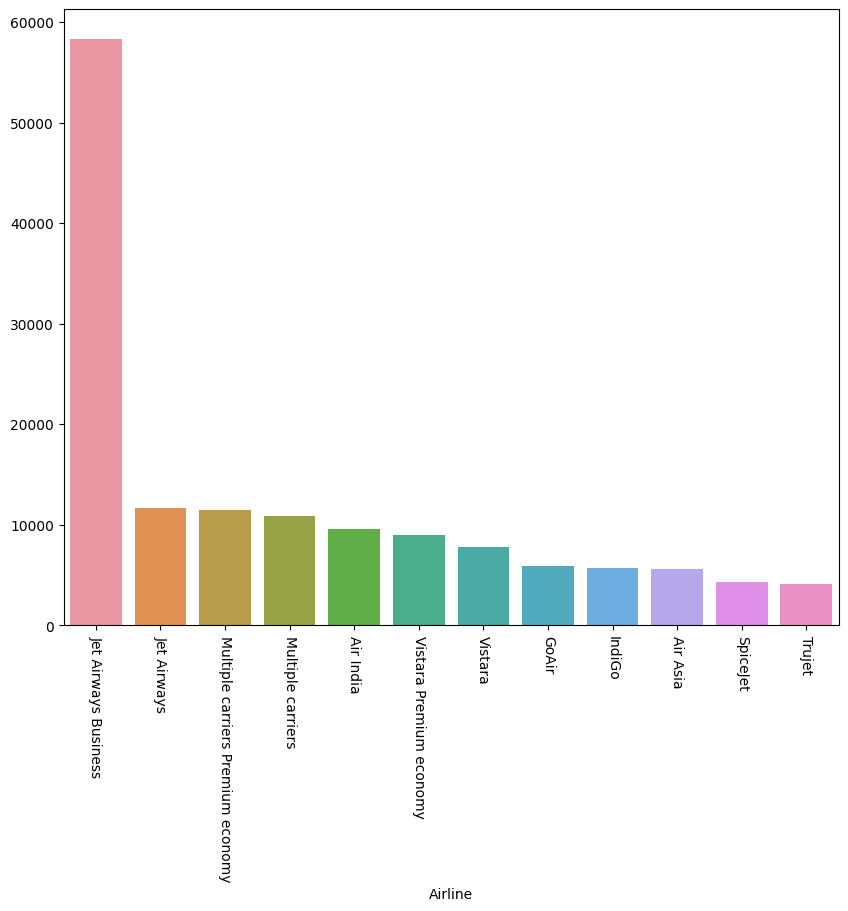

In [21]:
Airprices = df.groupby(df.Airline)['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=Airprices.index, y=Airprices.values, orient='v')
plt.xticks(rotation=270)

plt.show()

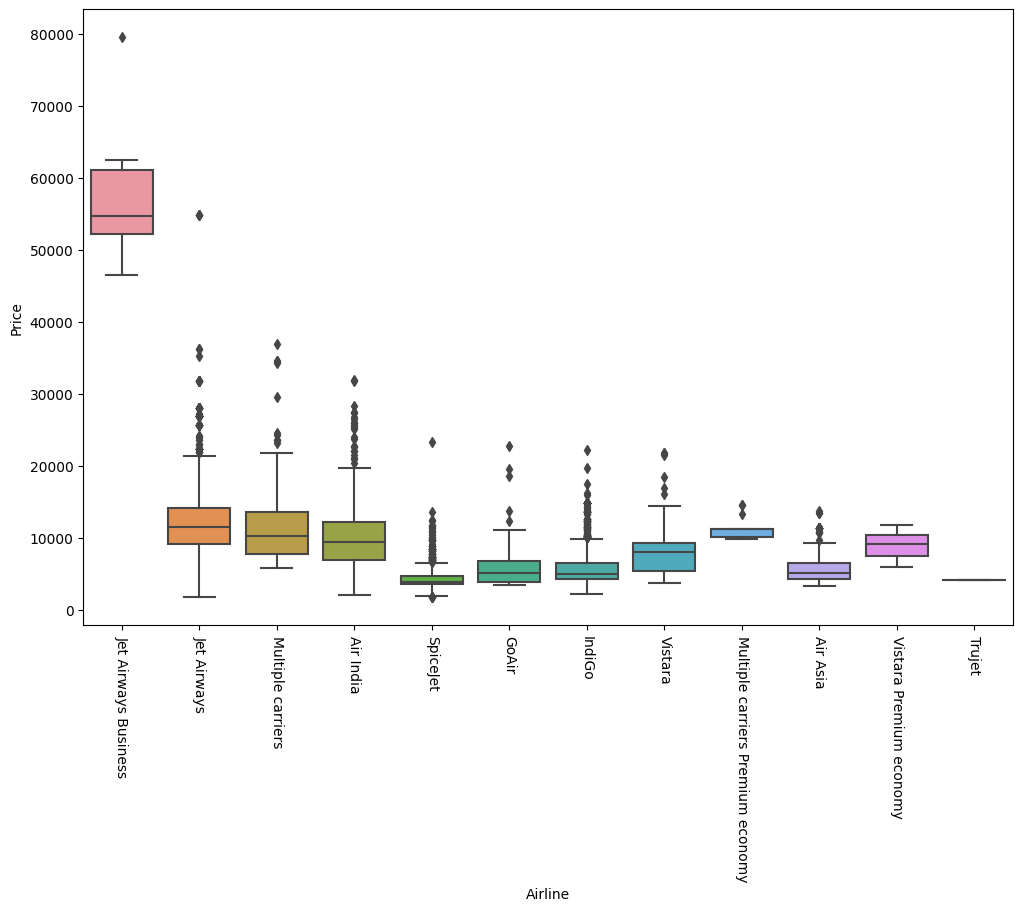

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df.sort_values(by='Price', ascending=False), x='Airline', y='Price')
plt.xticks(rotation=270)
plt.show()

Airline x stops by price

In [23]:
df.groupby([df.Airline, df.Total_Stops])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

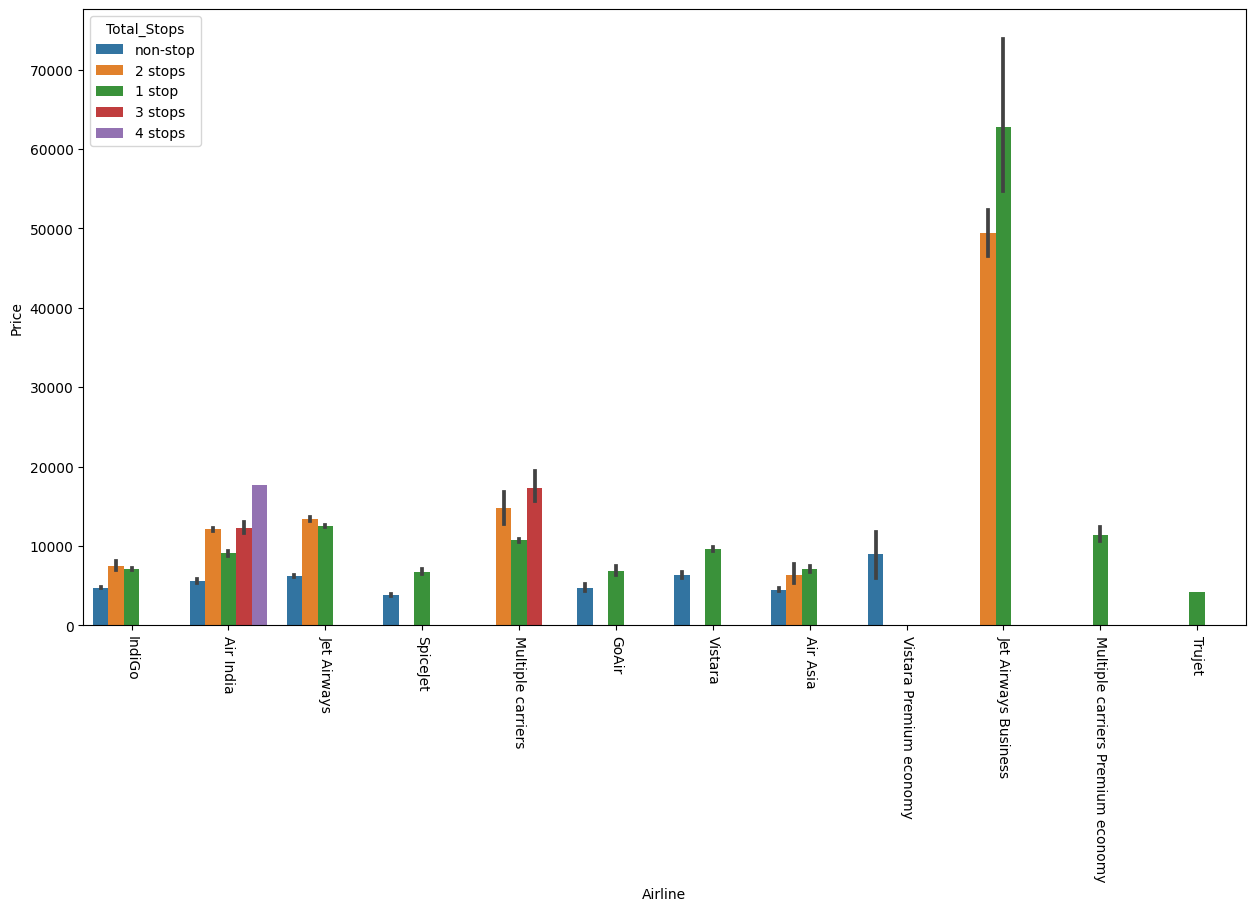

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x=df.Airline, y=df.Price, hue=df.Total_Stops)
plt.xticks(rotation=270)

plt.show()

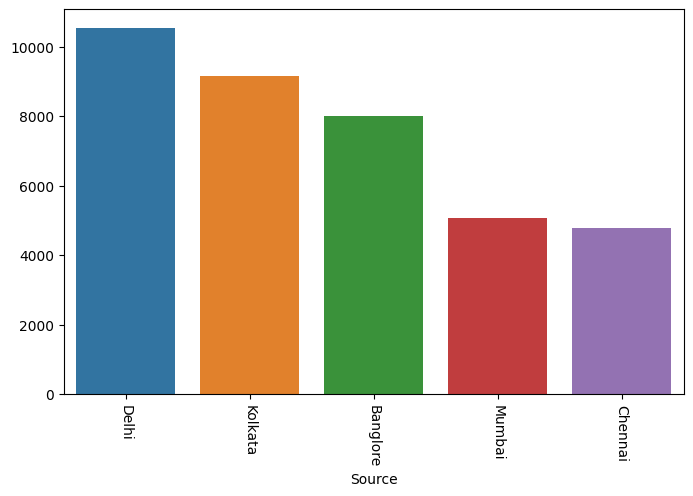

In [25]:
plt.figure(figsize=(8,5))

Source_prices = df.groupby(df.Source)['Price'].mean().sort_values(ascending=False)
sns.barplot(x=Source_prices.index, y=Source_prices.values)
plt.xticks(rotation=270)
plt.show()

Price by destination

In [26]:
Dest_prices = df.groupby(df.Destination)['Price'].mean().sort_values(ascending=False)
Dest_prices

Destination
New Delhi    11917.716738
Cochin       10540.113536
Banglore      9158.389411
Delhi         5143.918577
Hyderabad     5059.708752
Kolkata       4789.892388
Name: Price, dtype: float64

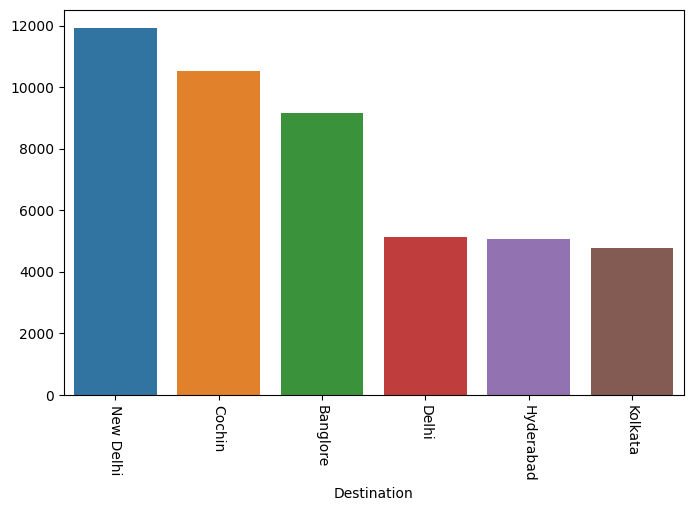

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x=Dest_prices.index, y=Dest_prices.values)
plt.xticks(rotation=270)

plt.show()

## **More Feature Engineering**

In [28]:
# We have the same place with two names

print(df.Destination.value_counts())

# We need to replace them

df.replace('New Delhi', 'Delhi', inplace=True)

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [29]:
df.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

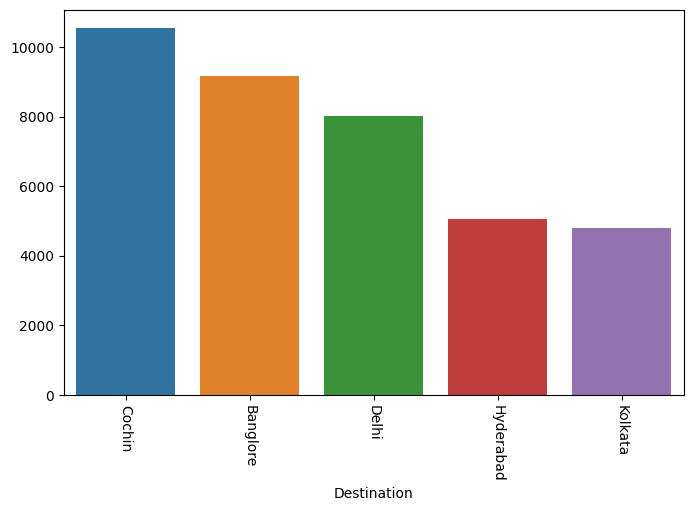

In [30]:
# Barplotting again with the correct value

Dest_prices2 = df.groupby(df.Destination)['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=Dest_prices2.index, y=Dest_prices2.values)
plt.xticks(rotation=270)

plt.show()

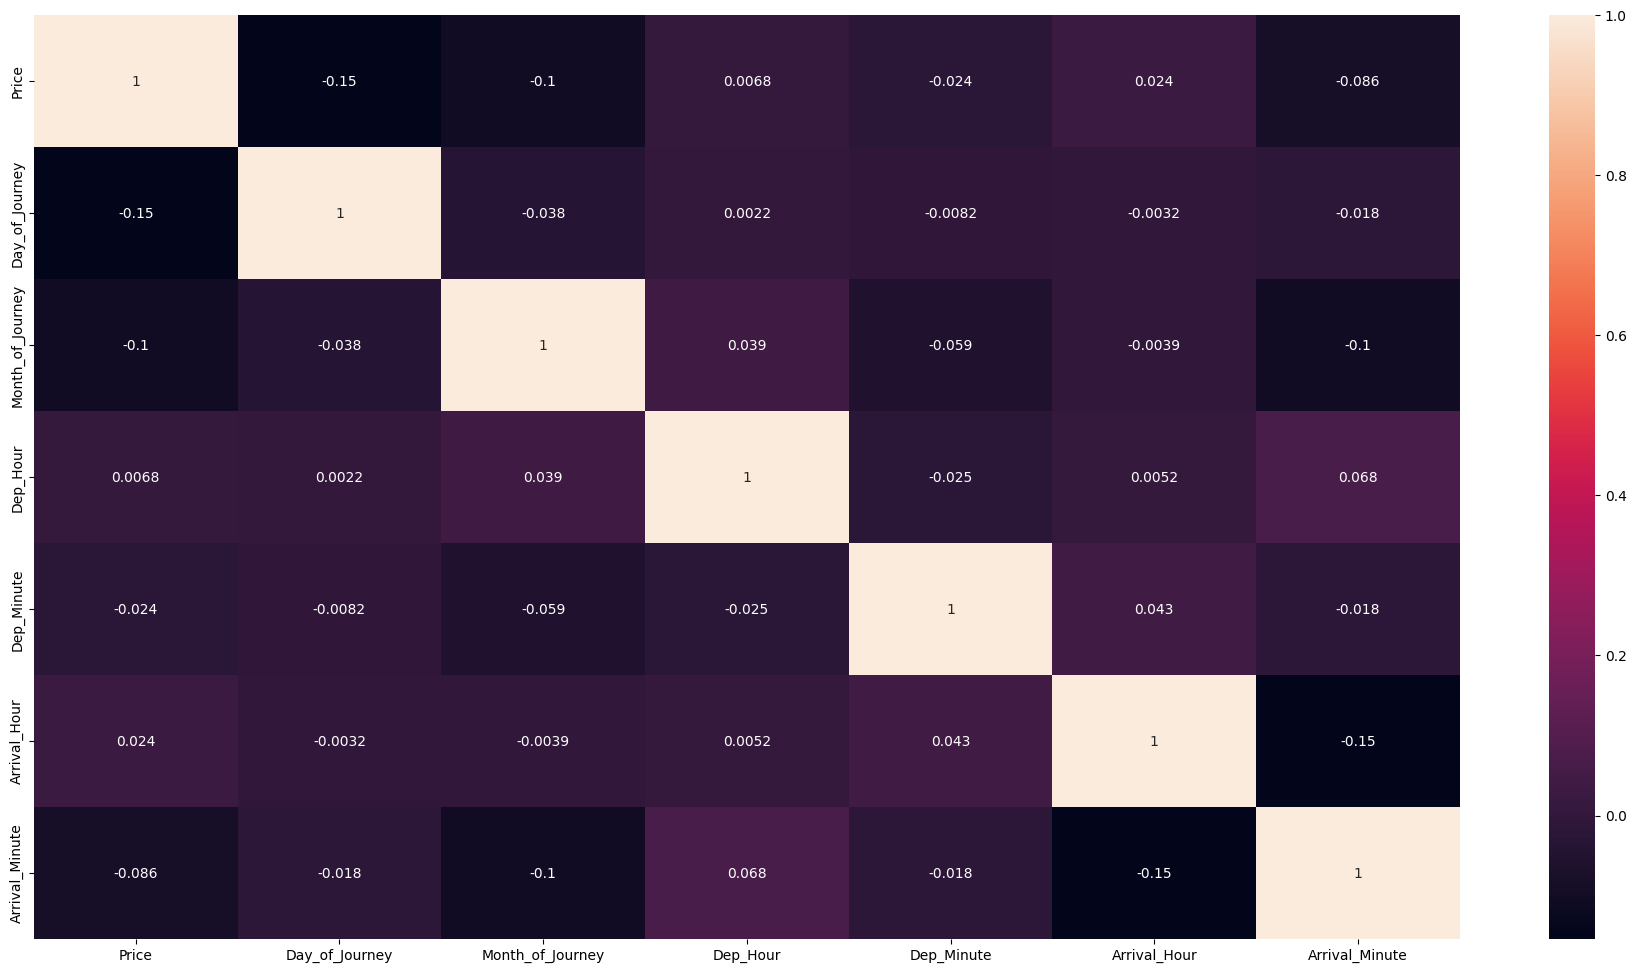

In [31]:
plt.figure(figsize=(23,12))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [32]:
dummies = pd.get_dummies(df[['Total_Stops', 'Airline', 'Source', 'Destination']], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,...,0,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,...,0,0,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,...,0,0,0,1,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,...,0,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,...,0,0,0,0,0,0,0,1,0,0


In [33]:
dummies

,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10679,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10680,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10681,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [34]:
df.drop(['Total_Stops', 'Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [35]:
print(df.shape)
df.head()

(10682, 34)


,Route,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hr,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,BLR → DEL,No info,3897,24,3,22,20,1,10,2,...,0,0,0,0,0,0,0,1,0,0
1,CCU → IXR → BBI → BLR,No info,7662,1,5,5,50,13,15,7,...,0,0,0,0,1,0,0,0,0,0
2,DEL → LKO → BOM → COK,No info,13882,9,6,9,25,4,25,19,...,0,0,0,1,0,0,1,0,0,0
3,CCU → NAG → BLR,No info,6218,12,5,18,5,23,30,5,...,0,0,0,0,1,0,0,0,0,0
4,BLR → NAG → DEL,No info,13302,1,3,16,50,21,35,4,...,0,0,0,0,0,0,0,1,0,0


In [36]:
# As we can see we need to change the 'Duration_Hr' and 'Duration_Min' dtype

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Route                                      10682 non-null  object
 1   Additional_Info                            10682 non-null  object
 2   Price                                      10682 non-null  int64 
 3   Day_of_Journey                             10682 non-null  int64 
 4   Month_of_Journey                           10682 non-null  int64 
 5   Dep_Hour                                   10682 non-null  int64 
 6   Dep_Minute                                 10682 non-null  int64 
 7   Arrival_Hour                               10682 non-null  int64 
 8   Arrival_Minute                             10682 non-null  int64 
 9   Duration_Hr                                10682 non-null  object
 10  Duration_Min                      

In [37]:
df['Duration_Hr'] = df['Duration_Hr'].astype(int)
df['Duration_Min'] = df['Duration_Min'].astype(int)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Route                                      10682 non-null  object
 1   Additional_Info                            10682 non-null  object
 2   Price                                      10682 non-null  int64 
 3   Day_of_Journey                             10682 non-null  int64 
 4   Month_of_Journey                           10682 non-null  int64 
 5   Dep_Hour                                   10682 non-null  int64 
 6   Dep_Minute                                 10682 non-null  int64 
 7   Arrival_Hour                               10682 non-null  int64 
 8   Arrival_Minute                             10682 non-null  int64 
 9   Duration_Hr                                10682 non-null  int32 
 10  Duration_Min                      

# **Test Data**

In [39]:
df_test = pd.read_excel('Test_set.xlsx')
print(df_test.shape)
df_test.head()

(2671, 10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [40]:
# Repeating the same feature engineering in the test data

# Date of journey
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'], dayfirst=True)
df_test['Day_of_Journey'] = (df_test['Date_of_Journey']).dt.day 
df_test['Month_of_Journey'] = (df_test['Date_of_Journey']).dt.month

# Departure time
df_test['Dep_Time'] = pd.to_datetime(df_test['Dep_Time'])
df_test['Dep_Hour'] = (df_test['Dep_Time']).dt.hour
df_test['Dep_Minute'] = (df_test['Dep_Time']).dt.minute

# Arrival time
df_test['Arrival_Time'] = pd.to_datetime(df_test['Arrival_Time'])
df_test['Arrival_Hour'] = (df_test['Arrival_Time']).dt.hour
df_test['Arrival_Minute'] = (df_test['Arrival_Time']).dt.minute

# Duration time
duration=df_test['Duration'].str.split(' ',expand=True)
duration[1].fillna('00m',inplace=True)
df_test['Duration_Hr']=duration[0].apply(lambda x: x[:-1])
df_test['Duration_Min']=duration[1].apply(lambda x: x[:-1]) 

# Changing the dtype
df_test['Duration_Hr'] = df_test['Duration_Hr'].astype(int)
df_test['Duration_Min'] = df_test['Duration_Min'].astype(int)

# Encoding categorical
dummies = pd.get_dummies(df_test[['Total_Stops', 'Airline', 'Source', 'Destination']], drop_first=True)
df_test = pd.concat([df_test, dummies], axis=1)

# Dropping the original columns
df_test.drop(['Total_Stops', 'Airline', 'Source', 'Destination','Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

In [41]:
print(df_test.shape)
df_test.head()

(2671, 33)


,Route,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hr,Duration_Min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,DEL → BOM → COK,No info,6,6,17,30,4,25,10,55,...,0,0,1,0,0,1,0,0,0,0
1,CCU → MAA → BLR,No info,12,5,6,20,10,20,4,0,...,0,0,0,1,0,0,0,0,0,0
2,DEL → BOM → COK,In-flight meal not included,21,5,19,15,19,0,23,45,...,0,0,1,0,0,1,0,0,0,0
3,DEL → BOM → COK,No info,21,5,8,0,21,0,13,0,...,0,0,1,0,0,1,0,0,0,0
4,BLR → DEL,No info,24,6,23,55,2,45,2,50,...,0,0,0,0,0,0,1,0,0,0


# **Test training split**

In [42]:
X = df.drop(['Price', 'Route', 'Additional_Info'], axis=1)
y = df.Price

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**ExtraTreeRegressor**

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score

ET_model = ExtraTreesRegressor(n_estimators=120)
ET_model.fit(X_train, y_train)
y_pred = ET_model.predict(X_test)

score = r2_score(y_test, y_pred)
score

0.8042421957885504

**RandomForestRegressor**

In [45]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

score = r2_score(y_test, y_pred)
score

0.7924270962420888

Hyperparameter tuning

In [46]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 20)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 10)]
min_samples_split = [2, 5, 10, 15, 30, 60, 100]
min_samples_leaf = [1, 2, 5, 7, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs=-1)

In [47]:
rCV.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [6, 10, 14, 19, 23, 27, 32,
                                                      36, 40, 45],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 7, 10],
                                        'min_samples_split': [2, 5, 10, 15, 30,
                                                              60, 100],
                                        'n_estimators': [80, 154, 229, 304, 378,
                                                         453, 528, 603, 677,
                                                         752, 827, 902, 976,
                                                         1051, 1126, 1201, 1275,
                                                         1350, 1425, 1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [48]:
rCV_pred = rCV.predict(X_test)
rCV_pred

array([16669.58421294,  6168.66939478,  8594.01981969, ...,
        6746.36159942, 11879.738209  , 12507.18365202])

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE', mean_absolute_error(y_test, rCV_pred))
print('MSE', mean_squared_error(y_test, rCV_pred))

MAE 1308.2194901716355
MSE 4101061.228187645


In [50]:
r2_score(y_test, rCV_pred)

0.8098019425173228

**CatBoost**

In [51]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor()
cat_model.fit(X_train, y_train)

Learning rate set to 0.057463
0:	learn: 4450.0767133	total: 147ms	remaining: 2m 26s
1:	learn: 4297.7054538	total: 149ms	remaining: 1m 14s
2:	learn: 4160.9457794	total: 151ms	remaining: 50.1s
3:	learn: 4030.6622548	total: 153ms	remaining: 38s
4:	learn: 3928.3725796	total: 155ms	remaining: 30.8s
5:	learn: 3813.5872636	total: 157ms	remaining: 26s
6:	learn: 3710.6703437	total: 159ms	remaining: 22.5s
7:	learn: 3633.4691762	total: 161ms	remaining: 20s
8:	learn: 3542.3623608	total: 163ms	remaining: 17.9s
9:	learn: 3466.6056954	total: 164ms	remaining: 16.3s
10:	learn: 3391.0409170	total: 166ms	remaining: 14.9s
11:	learn: 3326.6973259	total: 168ms	remaining: 13.8s
12:	learn: 3266.0056890	total: 170ms	remaining: 12.9s
13:	learn: 3200.5349037	total: 172ms	remaining: 12.1s
14:	learn: 3141.8922846	total: 174ms	remaining: 11.4s
15:	learn: 3096.3705915	total: 176ms	remaining: 10.8s
16:	learn: 3042.7362689	total: 177ms	remaining: 10.3s
17:	learn: 2999.7930583	total: 179ms	remaining: 9.77s
18:	learn: 2

In [52]:
cat_pred = cat_model.predict(X_test)

In [53]:
score = r2_score(y_test, cat_pred)
score

0.8625043962914838

**LightGBM**

In [54]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train, y_train)

LGBMRegressor()

In [55]:
lgb_pred = lgb_model.predict(X_test)

In [56]:
score = r2_score(y_test, lgb_pred)
score

0.8257386081412161

**XGBoost**

In [57]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [58]:
xgb_pred = xgb_model.predict(X_test)

In [59]:
score = r2_score(y_test, xgb_pred)
score

0.850672596396804

In [62]:
df.columns

Index(['Route', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour',
       'Arrival_Minute', 'Duration_Hr', 'Duration_Min', 'Total_Stops_2 stops',
       'Total_Stops_3 stops', 'Total_Stops_4 stops', 'Total_Stops_non-stop',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')

In [61]:
df_deploy = df.drop(['Route', 'Additional_Info'], axis=1)

In [65]:
df_deploy.to_csv('df_deployed')